<a href="https://colab.research.google.com/github/AkashJahid/STHPP/blob/main/PAAC_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import matthews_corrcoef

In [ ]:
df_tr = pd.read_csv('/content/PAAC Training.csv')
df_ts = pd.read_csv('/content/PAAC testing.csv')

In [ ]:
columns = df_tr.columns.tolist()
columns = [c for c in columns if c not in ['Target']]
target = 'Target'
xtrain = df_tr[columns]
ytrain = df_tr[target]

In [ ]:
columns = df_ts.columns.tolist()
columns = [c for c in columns if c not in ['Target']]
target = 'Target'
xtest = df_ts[columns]
ytest = df_ts[target]

**Cross Valadiation**

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

algorithm define : **Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators = 500, max_depth = 50)

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9297025878717652,
 0.9087136929460581,
 0.9383033419023136,
 0.9232715008431703)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8620546103891159

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1312,  110],
       [  72, 1095]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9383033419023136
Specificity: 0.9226441631504922


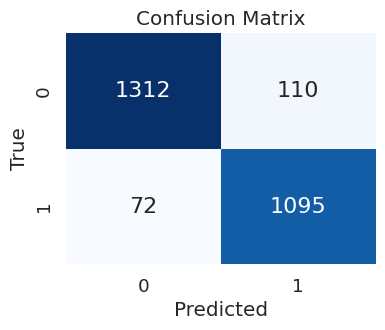

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Independent Test**

In [ ]:
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=50, n_estimators=500)

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9769230769230769, 0.9558823529411765, 1.0, 0.9774436090225563)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.947528479243818

In [ ]:
cm=confusion_matrix(ytest,pred)

In [ ]:
cm

array([[124,   6],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 0.9538461538461539


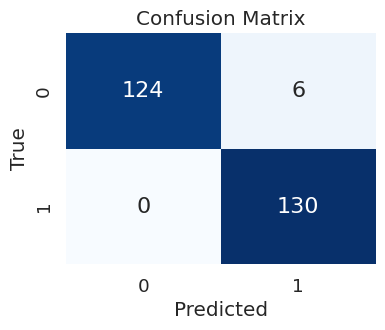

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

xb booster

In [ ]:
model = XGBClassifier(n_estimators = 500,max_depth = 7, base_score = 0.88, learning_rate = 0.2)


In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

Cross Valadiation

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9185013518733102, 0.887987012987013, 0.9374464438731791, 0.9120466861192162)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8371436772437207

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1284,  138],
       [  73, 1094]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9374464438731791
Specificity: 0.9029535864978903


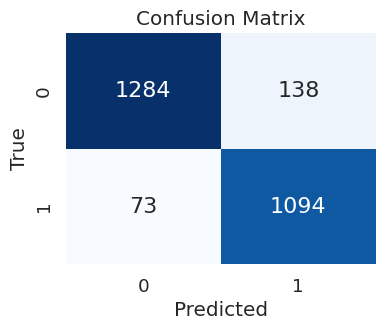

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

indipendent test

In [ ]:
model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.88, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9730769230769231, 0.948905109489051, 1.0, 0.9737827715355805)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.954863710632231

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[123,   7],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 0.9461538461538461


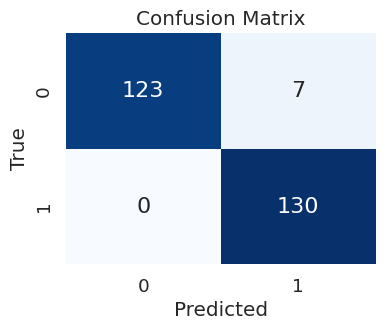

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**LGBM**

In [ ]:
model = LGBMClassifier(max_depth=7, learning_rate=0.5)

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9177288528389339,
 0.8834405144694534,
 0.9417309340188518,
 0.9116549149730402)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8363153122810107

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1277,  145],
       [  68, 1099]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9417309340188518
Specificity: 0.8980309423347398


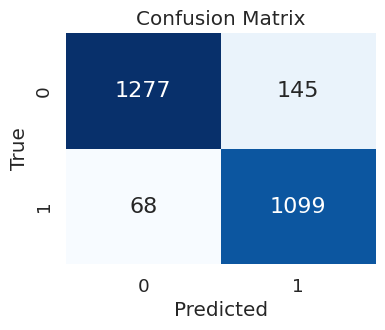

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1167, number of negative: 1422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5349
[LightGBM] [Info] Number of data points in the train set: 2589, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450753 -> initscore=-0.197628
[LightGBM] [Info] Start training from score -0.197628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

LGBMClassifier(learning_rate=0.5, max_depth=7)

In [ ]:
pred = model.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9769230769230769, 0.9558823529411765, 1.0, 0.9774436090225563)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.954863710632231

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[124,   6],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 0.9538461538461539


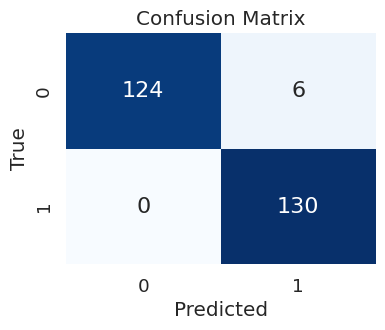

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**CAT** **BOOSTER**

In [ ]:
model = CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028)


In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9161838547701815,
 0.8793929712460063,
 0.9434447300771208,
 0.9102935097147581)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8336346602974842

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1271,  151],
       [  66, 1101]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9434447300771208
Specificity: 0.8938115330520394


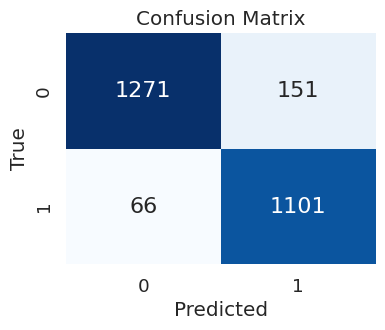

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

0:	learn: 0.5646790	total: 153ms	remaining: 8.11s
1:	learn: 0.4787145	total: 261ms	remaining: 6.78s
2:	learn: 0.4137382	total: 378ms	remaining: 6.42s
3:	learn: 0.3687657	total: 483ms	remaining: 6.04s
4:	learn: 0.3368358	total: 559ms	remaining: 5.47s
5:	learn: 0.3110064	total: 619ms	remaining: 4.95s
6:	learn: 0.2841914	total: 673ms	remaining: 4.52s
7:	learn: 0.2687029	total: 732ms	remaining: 4.21s
8:	learn: 0.2541157	total: 818ms	remaining: 4.09s
9:	learn: 0.2381265	total: 948ms	remaining: 4.17s
10:	learn: 0.2259745	total: 1.06s	remaining: 4.16s
11:	learn: 0.2098718	total: 1.19s	remaining: 4.16s
12:	learn: 0.1990625	total: 1.31s	remaining: 4.12s
13:	learn: 0.1912814	total: 1.43s	remaining: 4.08s
14:	learn: 0.1857581	total: 1.54s	remaining: 4.01s
15:	learn: 0.1805336	total: 1.66s	remaining: 3.94s
16:	learn: 0.1742314	total: 1.76s	remaining: 3.83s
17:	learn: 0.1668966	total: 1.87s	remaining: 3.75s
18:	learn: 0.1582080	total: 2s	remaining: 3.69s
19:	learn: 0.1525557	total: 2.14s	remaining:

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9769230769230769, 0.9558823529411765, 1.0, 0.9774436090225563)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.954863710632231

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[124,   6],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 1.0
Specificity: 0.9538461538461539


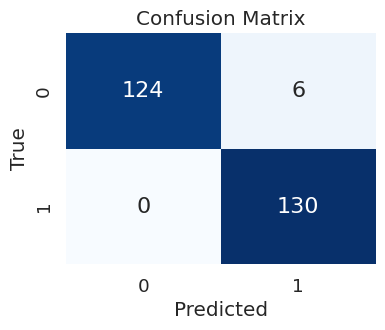

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Stacking**

In [ ]:
estimator = [('RF',RandomForestClassifier(n_estimators = 400, max_depth = 10)),
             ('XGB',XGBClassifier(n_estimators = 500,max_depth = 7, base_score = 0.88, learning_rate = 0.2)),
             ('LGBM',LGBMClassifier(max_depth=7, learning_rate=0.5)),
             ('CAT',CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028))]
model = StackingClassifier(estimators=estimator, final_estimator=CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028))

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9354963306295867,
 0.9578754578754579,
 0.8963153384747216,
 0.9260734838424082)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8663564590192189

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1376,   46],
       [ 121, 1046]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8963153384747216
Specificity: 0.9676511954992968


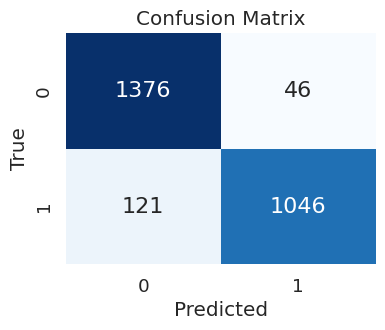

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1167, number of negative: 1422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5349
[LightGBM] [Info] Number of data points in the train set: 2589, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450753 -> initscore=-0.197628
[LightGBM] [Info] Start training from score -0.197628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=400)),
                               ('XGB',
                                XGBClassifier(base_score=0.88, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=Non...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('LGBM',
                                LGBMClassifier(learning_rate=0.5, max_depth=7)),
                               ('CAT',
                                <catboost.core.CatBoostClassifier object at 0x7e67306db6a0>)],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7e67306d8040>)

In [ ]:
pred = model.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9884615384615385,
 0.9847328244274809,
 0.9923076923076923,
 0.9885057471264368)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.976951981255433

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[128,   2],
       [  1, 129]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9923076923076923
Specificity: 0.9846153846153847


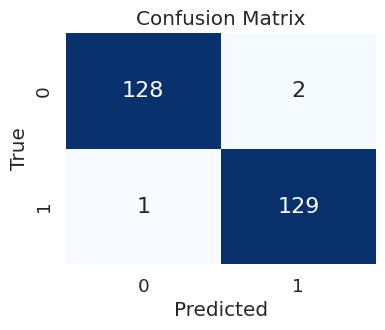

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()